<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares2/TU_Dortmund/blob/main/Summer_Task_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries to be use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from numpy.core.function_base import linspace
# from math import floor
# from math import ceil
# from numpy.ma.core import size

# BBSS lecture
filename = 'MoviesOnStreamingPlatforms.csv'
df = pd.read_csv(filename, sep = ',')

# Data review
print(df.shape)
df.head()

(9515, 11)


,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [2]:
# There are not duplicated movies
# df = df.drop_duplicates(subset=['Title'], keep='last')

In [3]:
unique_values = df['Type'].unique()
print(unique_values)
# After checking that 'Type' column has just value 0 it will be removed also ID and Unnamed columns (do not give info)
df.drop(['Type', 'ID', 'Unnamed: 0'], axis=1, inplace=True)

[0]


As it is not said in the task statment, I am assuming that the movies without age filter and those for "all" are for all audiences (no exception).

Another way to do it would be removing all movies without age filter.

In [4]:
df['Age'] = pd.to_numeric(df['Age'].str.replace('+', '', regex=False), errors='coerce')
df['Age'].fillna(0, inplace=True)  # Replace NaN with 0

<ipython-input-4-ad2c15c6ca38>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(0, inplace=True)  # Replace NaN with 0


Conversion of the movies qualifications to numeric.

In [5]:
df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'].str.replace('/100', '', regex=False), errors='coerce')

# Comparison between two big platforms
Disney+ has the reputation of being a platform for children, while other streaming platforms like Netflix have a more adult viewership. Is this really true? Especially since Disney+ also features many adult movies (Marvel, Star Wars, ...). To find out, we want to compare the age restrictions of the movies available on Disney+ and Netflix. Moreover, are the movies on Netflix in general better than those on Disney+? Use the Rotten Tomatoes score to answer this question.

Filtering the data creating 2 dfs one with just the movies on Disney+ and the other one with just the movies on Netflix.

We see that there is a huge difference between the number of movies on each platform.

In [24]:
# Filter data for Disney+ and Netflix
disney_data = df[df['Disney+'] == 1]
netflix_data = df[df['Netflix'] == 1]

print('Number of different movies on each platform:', netflix_data.shape[0], 'on Netflix and', disney_data.shape[0], 'on Disney+.')
x = round(((netflix_data.shape[0]*100)/disney_data.shape[0]),2)
print('Considering Disney+ has a 100% movies, Netflix has a', x, '%, 4 times more.')

Number of different movies on each platform: 3695 on Netflix and 922 on Disney+.
Considering Disney+ has a 100% movies, Netflix has a 400.76 %, 4 times more.


In [29]:
# Descriptive statistics Age
age_stats_disney = disney_data['Age'].describe()
age_stats_netflix = netflix_data['Age'].describe()

# Print Descriptive Statistics Age
print("Disney+ Age Stats:\n", age_stats_disney)
print("\nNetflix Age Stats:\n", age_stats_netflix)

Disney+ Age Stats:
 count    922.000000
mean       3.225597
std        4.403024
min        0.000000
25%        0.000000
50%        0.000000
75%        7.000000
max       18.000000
Name: Age, dtype: float64

Netflix Age Stats:
 count    3695.000000
mean        6.957510
std         7.856219
min         0.000000
25%         0.000000
50%         0.000000
75%        16.000000
max        18.000000
Name: Age, dtype: float64


## Statistic description of the data
###Disney+

* **Count:** There are 922 movies in the Disney+ dataset.
* **Mean:** The average age restriction for movies on Disney+ is approximately 3.23 years. This indicates a strong focus on family-friendly content.
* **Standard Deviation (std):** The age restriction standard deviation is 4.40, indicating that most movies are rated close to the mean, but there is still some variation.
* **Min and Max** does not give much information.
* **Quartiles:**

  1.  The **25%** of movies have an age restriction of **0** (suitable for all ages).
  2.   The **median** (50th percentile) is also **0**, meaning at least half of the movies are suitable for all audiences.
  3. The **75%** of movies are rated for audiences up to **7yo**.

This indicates a clear focus on younger audiences.



###Netflix

* **Count:** There are 3695 movies in the Netflix dataset, significantly more than Disney+.
* **Mean:** The average age restriction for Netflix movies is approximately 6.96 years, indicating a broader focus that includes more mature content compared to Disney+.
* **Standard Deviation (std):** The standard deviation is 7.86, almost double that of Disney+, showing a much wider spread in age ratings.
* **Min and Max** does not give comparative information.
* **Quartiles:**
  1. The **25%** of movies have an age restriction of **0**, similar to Disney+.
  2. The **median** (50th percentile) is **0**, meaning half the movies are suitable for all audiences.
  3. The **75%** of movies have an age restriction of **16yo**.

This indicates that Netflix includes a significant portion of content aimed at teenagers and adults, but at least have of the content of the platform is suitable for all ages.


## Comparison of Disney+ and Netflix Average Age Restriction


#### **1. Average Age Restriction**
Disney+ has a significantly lower average age restriction (**3.23 years**) compared to Netflix (**6.96 years**). This confirms that Disney+ predominantly caters to younger audiences with its family-friendly and child-centric content. On the other hand, Netflix's higher average age restriction reflects its broader inclusion of mature content.

#### **2. Spread of Age Ratings**
Netflix has a much wider spread in age ratings, with a **std** of **7.86**, compared to Disney+'s **4.40**. This demonstrates that Netflix offers a broader range of content, spanning from family-friendly movies to those exclusively for adults. Furthermore:
- The **75th percentile** for Netflix is **16 years**, much higher than Disney+'s **7 years**, showing Netflix's significant focus on older audiences.
- Disney+, by contrast, **concentrates** heavily on **younger audiences**, with the majority of its movies rated for all ages or young children. Even if, as it is highlighted on the statement, there are some movies for adults, therefore, the maximum value is 18.

#### **3. Content Focus**
- Disney+ is heavily oriented toward family-friendly content, as evidenced by:
  - A **low mean age restriction**.
  - A **75th percentile age of 7 years**, indicating that most of its movies are suitable for children.
  - A significant number of movies (over 50%) rated for audiences of all ages.
- Netflix, while provinding to older audiences on average, still includes a substantial amount of content for all audiences due to its larger overall library. This diversity in age restrictions highlights Netflix's ability to **serve a wider range of viewers**.

#### **4. Impact of the Number of Movies on Each Platform**
The vast difference in the number of movies on each platform provides important context:
- Netflix offers **3695 movies**, which is **4 times more** than Disney+'s **922 movies**. In relative terms (as expressed before), Disney+ represents **100% of its library**, while Netflix provides **400.76%** in comparison.
- Despite focusing more on mature audiences, Netflix still hosts a **large number of movies suitable for all ages**, as shown by the significant share of movies with an age restriction of 0.

#### **Conclusion**
Disney+ clearly prioritizes family-friendly and child-focused content, as indicated by its lower average age restriction, narrower spread of age ratings, and focus on younger audiences. However, Netflix's significantly larger library allows it to simultaneously cater to older audiences while maintaining a considerable selection of movies suitable for all ages. This dual focus positions Netflix as a platform for a much broader audience compared to Disney+'s more targeted demographic. To make this even more clear, let's see some graphics that show the way the data behaves visually.

####Boxplot
The boxplots visually represent the distribution of age restrictions for movies on Disney+ and Netflix. These plots confirm and supplement the conclusions drawn earlier.
* **Outlier:** Disney+ has an outlier at **18 years**. This represents one or very few movies rated for adult audiences, which is atypical for the platform. It may correspond to select content such as Star Wars, Marvel, or other mature-themed movies.

* **Overall Spread:** Netflix demonstrates a broader spread of age restrictions, reinforcing its appeal to a wider demographic.
Disney+ maintains a tighter distribution, heavily skewed toward younger audiences, confirming its family-friendly reputation.

###Summary

- The boxplots reaffirm that **Disney+** caters predominantly to **younger audiences**, with a significant portion of movies suitable for children (0–7 years).
- **Netflix**, while catering to older audiences on average, also includes a substantial selection of family-friendly movies, thanks to its **larger library size**.
- The **outlier** on Disney+ (age 18) highlights **rare exceptions** in its library, which are atypical for its usual family-oriented offerings

<ipython-input-40-9d631befec80>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


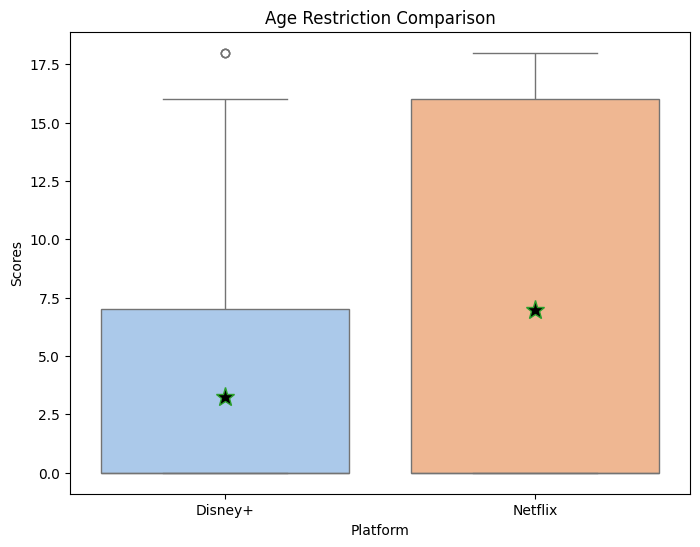

In [40]:
# Combine the Age restrictions into one DataFrame
age_data = pd.DataFrame({
    'Platform': ['Disney+'] * len(disney_data['Age']) + ['Netflix'] * len(netflix_data['Age']),
    'Score': list(disney_data['Age']) + list(netflix_data['Age'])
})

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Platform',
    y='Score',
    data=age_data,
    palette='pastel',
    showmeans=True,
    meanprops={"marker": "*", "markerfacecolor": "black", "markersize": 14}
)
plt.title('Age Restriction Comparison', fontsize=12)
plt.ylabel('Scores')
plt.show()

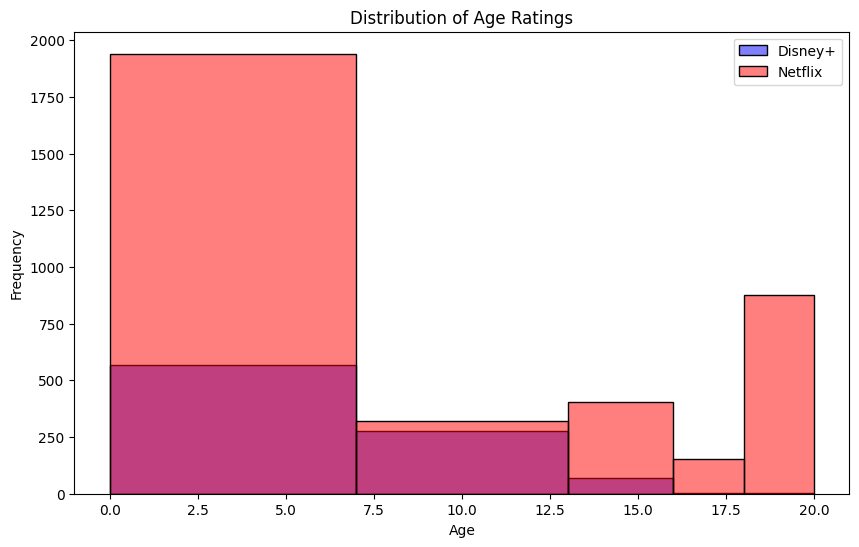

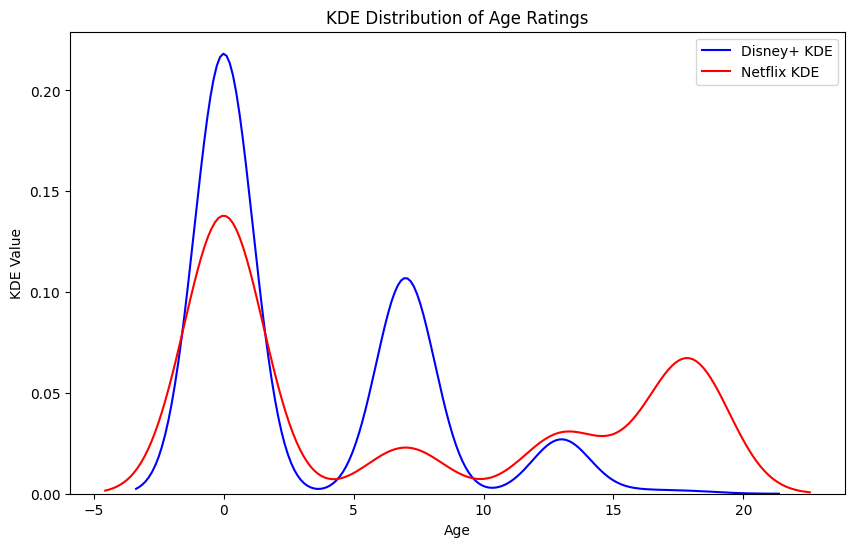

In [30]:
# Visualization: Histograms for Age
bins = [0, 7, 13, 16, 18, 20]
plt.figure(figsize=(10, 6))
sns.histplot(disney_data['Age'], bins=bins, color='blue', kde=False, label='Disney+', alpha=0.5)
sns.histplot(netflix_data['Age'], bins=bins, color='red', kde=False, label='Netflix', alpha=0.5)
plt.title('Distribution of Age Ratings')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(disney_data['Age'], color='blue', label='Disney+ KDE')
sns.kdeplot(netflix_data['Age'], color='red', label='Netflix KDE')
plt.title('KDE Distribution of Age Ratings')
plt.xlabel('Age')
plt.ylabel('KDE Value')
plt.legend()
plt.show()

# # Visualization: Boxplots for Rotten Tomatoes
# plt.figure(figsize=(7, 5))
# sns.boxplot(data=[disney_data['Rotten Tomatoes'], netflix_data['Rotten Tomatoes']],
#             palette='pastel', showmeans=True)
# plt.xticks([0, 1], ['Disney+', 'Netflix'])
# plt.title('Rotten Tomatoes Scores Comparison')
# plt.ylabel('Scores')
# plt.show()

In [10]:
# Describe statistics Rotten Tomatoes
rotten_stats_disney = disney_data['Rotten Tomatoes'].describe()
rotten_stats_netflix = netflix_data['Rotten Tomatoes'].describe()

# Print Descriptive Statistics Rotten Tomatoes
print("\nDisney+ Rotten Tomatoes Stats:\n", rotten_stats_disney)
print("\nNetflix Rotten Tomatoes Stats:\n", rotten_stats_netflix)


Disney+ Rotten Tomatoes Stats:
 count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes, dtype: float64

Netflix Rotten Tomatoes Stats:
 count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes, dtype: float64


<ipython-input-33-0e53fa3f3d43>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


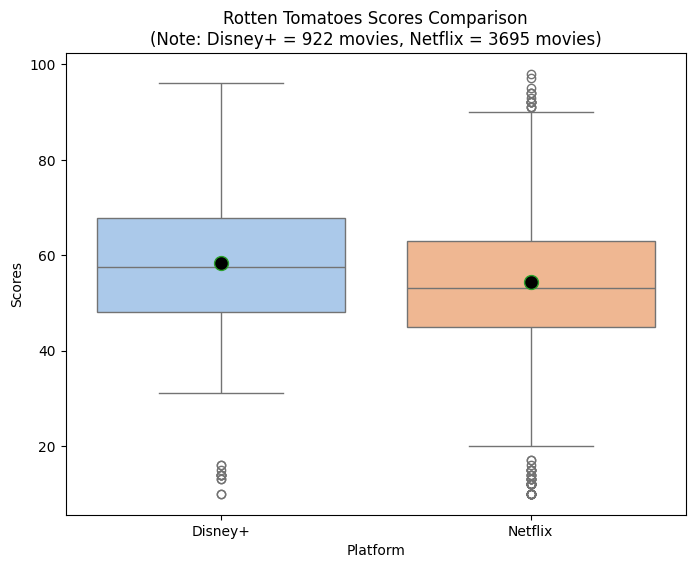

In [33]:
rotten_disney = disney_data['Rotten Tomatoes'].dropna()
rotten_netflix = netflix_data['Rotten Tomatoes'].dropna()

# Combine the Rotten Tomatoes scores into one DataFrame
rotten_data = pd.DataFrame({
    'Platform': ['Disney+'] * len(rotten_disney) + ['Netflix'] * len(rotten_netflix),
    'Score': list(rotten_disney) + list(rotten_netflix)
})

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Platform',
    y='Score',
    data=rotten_data,
    palette='pastel',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "black", "markersize": 10}
)
plt.title('Rotten Tomatoes Scores Comparison\n(Note: Disney+ = 922 movies, Netflix = 3695 movies)', fontsize=12)
plt.ylabel('Scores')
plt.show()